In [1]:
# !pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 35.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.1 MB/s eta 0:00:00


In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

2024-09-12 15:24:49.455500: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-12 15:24:51.346226: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-09-12 15:24:51.346366: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-09-12 15:24:51.350147: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libd3d12.so
2024-09-12 15:24:51.757047: I tensorflow/c/logging.cc:34] DirectML device enumeration: found 1 compatible adapters.


# Image Agumention
* 학습데이터 부족을 해결하기 위해서 이미지에 변형을 가해 새로운 이미지를 만들어 주는 것


In [ ]:
#이미지 키우기 변형등 포토샵 같은거?

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

In [5]:
image =load_img("./catanddog/bird.jpg")
image_array = img_to_array(image)
image_array.shape

(703, 454, 3)

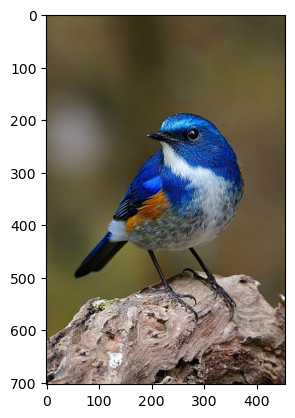

In [6]:
plt.imshow(image)
plt.show()

In [8]:
datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=40, 
            width_shift_range=0.3, 
            height_shift_range=0.2,
            shear_range=0.6, 
            zoom_range=0.3, 
            horizontal_flip=True, 
            vertical_flip=True, 
            fill_mode='nearest'
)

In [10]:
image_array.reshape((1,)+image_array.shape).shape

(1, 703, 454, 3)

In [11]:
image_array.shape

(703, 454, 3)

In [12]:
image_array = image_array.reshape((1,)+image_array.shape)

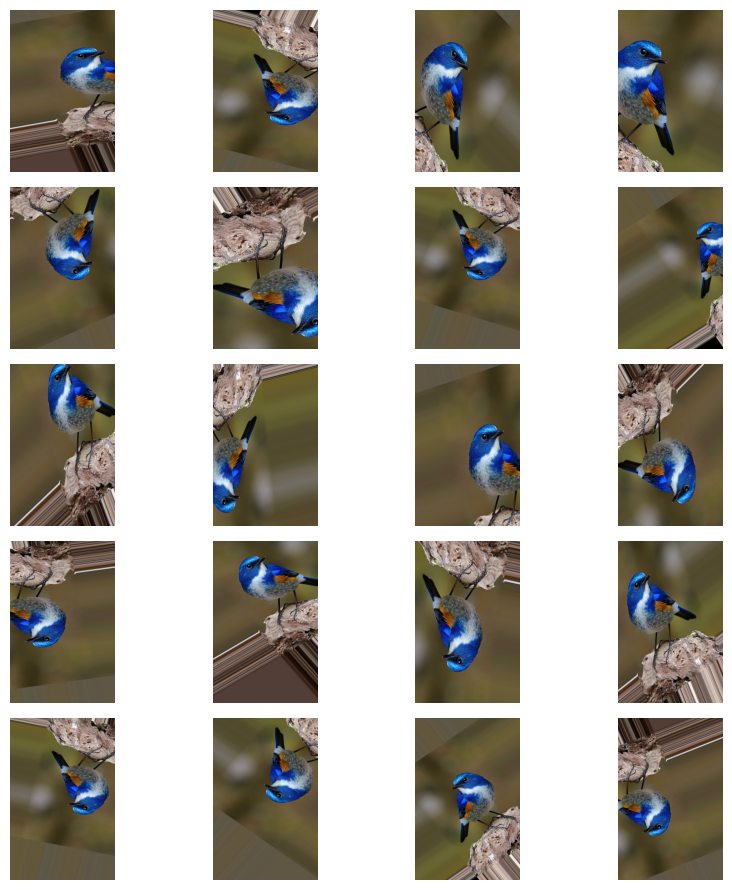

In [13]:
fig, axes = plt.subplots(5,4, figsize=(9,9))
axes = axes.ravel()

for i, batch in enumerate(datagen.flow(image_array, batch_size=1)):
    if i >= 20:
        break
    augmented_image= array_to_img(batch[0])
    axes[i].imshow(augmented_image)
    axes[i].axis('off')
plt.tight_layout()
plt.show()